In [59]:
import numpy as np
import pandas as pd # DataFrames and Series
import seaborn as sns #data visualization 
import matplotlib.pyplot as plt #creating static, animated, and interactive visualizations in Python.
#%matplotlib inline #Matplotlib plots are displayed within the notebook interface.
from sklearn.model_selection import train_test_split #used to split a dataset into training and testing subsets. 
from sklearn.preprocessing import StandardScaler #normalzie (0 and 1)
from sklearn.linear_model import LinearRegression #common technique for modeling 
from sklearn import metrics #calculating accuracy, mean squared error, etc.

In [5]:
df = pd.read_csv("car data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.describe() #for statistical analysis

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [18]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [19]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [21]:
fuel_type = df['Fuel_Type']
seller_type = df['Seller_Type']
transmission_type = df['Transmission']
selling_price = df['Selling_Price']

In [22]:
from matplotlib import style

Text(0.5, 0, 'Transmission type')

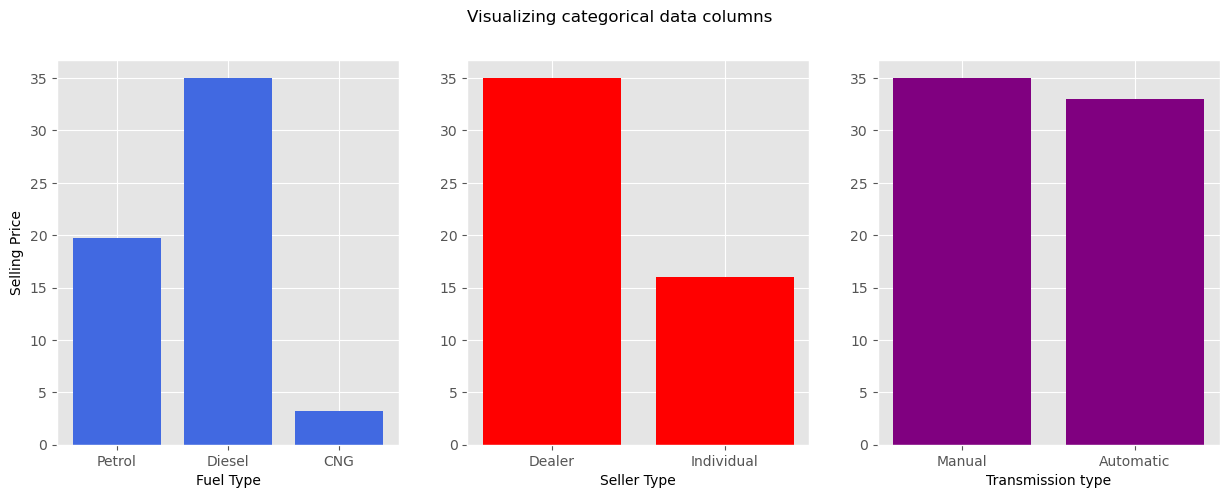

In [28]:
style.use ('ggplot')
fig = plt.figure(figsize= (15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot (1,3,1)
plt.bar (fuel_type, selling_price, color='royalblue') 
plt.xlabel ("Fuel Type") 
plt.ylabel("Selling Price") 
plt.subplot (1, 3,2) 
plt.bar (seller_type, selling_price, color='red') 
plt.xlabel("Seller Type") 
plt.subplot (1, 3, 3) 
plt.bar (transmission_type, selling_price, color='purple') 
plt.xlabel('Transmission type')

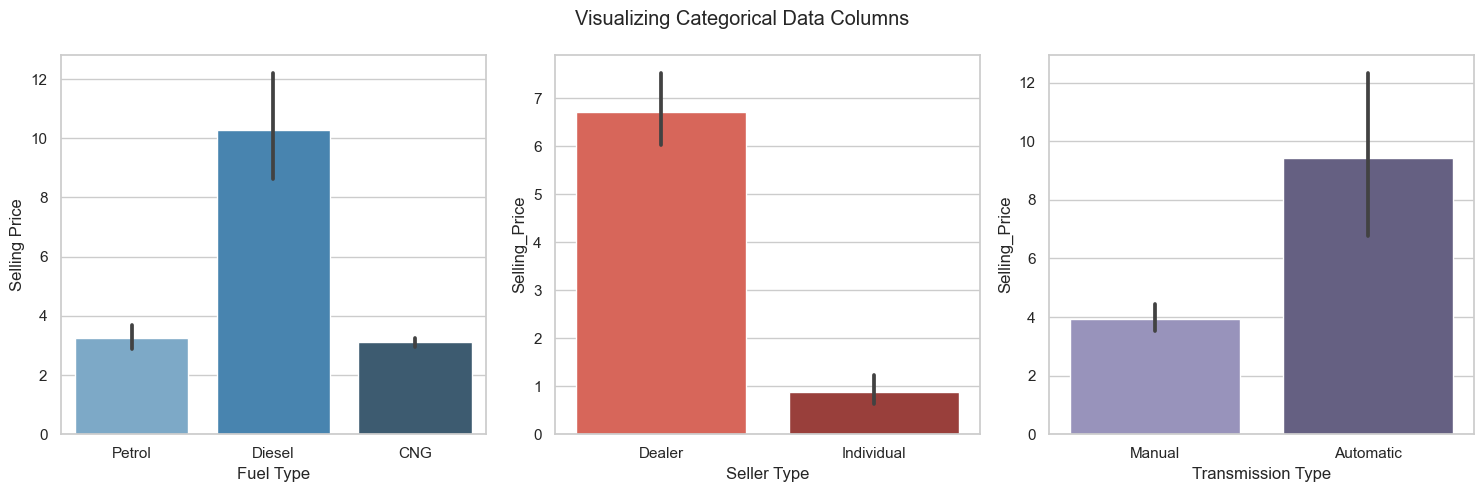

In [33]:
sns.set(style="whitegrid") #provides a white background with grid lines

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) #figsize parameter specifies the size 
fig.suptitle('Visualizing Categorical Data Columns')

# First subplot
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0], palette="Blues_d")
axes[0].set_xlabel("Fuel Type")
axes[0].set_ylabel("Selling Price")

# Second subplot
sns.barplot(x=seller_type, y=selling_price, ax=axes[1], palette="Reds_d")
axes[1].set_xlabel("Seller Type")

# Third subplot
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2], palette="Purples_d")
axes[2].set_xlabel('Transmission Type')

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()

2 Charts looks little bit different

In [35]:
petrol = df.groupby('Fuel_Type').get_group('Petrol')
petrol.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [40]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1
299,city,2017,11.50,12.50,9000,1,0,0,1


In [41]:
#manual encoding
df.replace({'Fuel_Type': {'Petrol':0, 'Diesel' :1, 'CNG':2}}, inplace=True) 
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1
299,city,2017,11.50,12.50,9000,1,0,0,1


C:\Users\okuma\AppData\Local\Temp\ipykernel_4404\2053392950.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


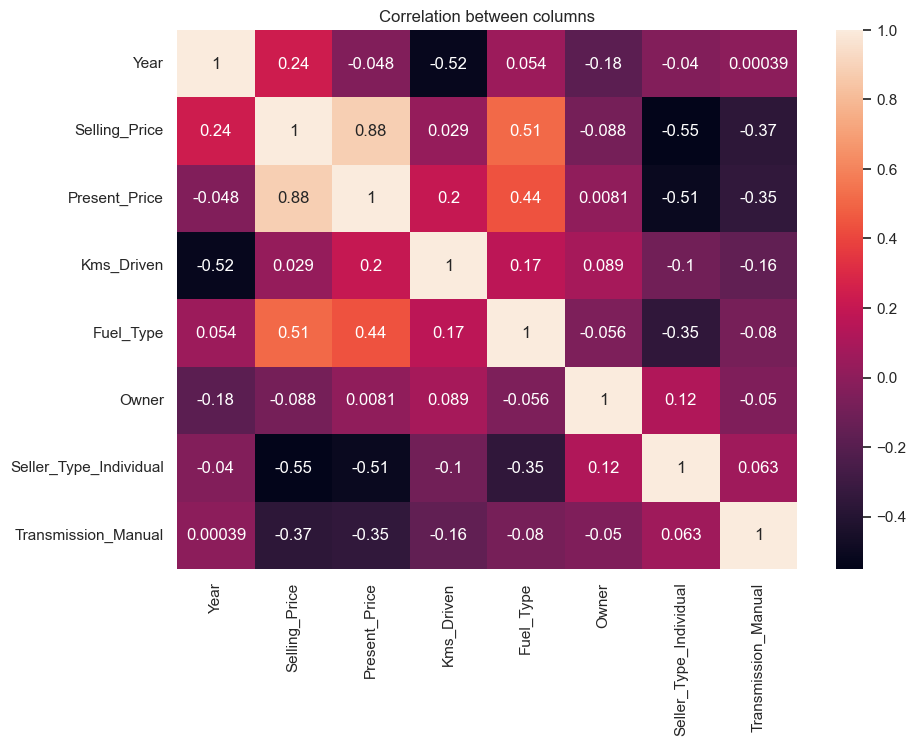

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True) #annot true for digits inside  
plt.title('Correlation between columns')
plt.show()

In [47]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#to normalize, scale each variable

In [56]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train,y_train)

LinearRegression()

In [62]:
pred = model.predict(X_test)

In [63]:
pred

array([ 2.84503948,  8.17433042,  6.15503229, -1.53474297,  9.10478102,
        7.12513416,  1.41208877,  0.85727713,  1.42824591,  7.18732696,
        8.77738476,  0.64604862,  8.19199294,  3.27496701,  6.58156734,
        3.12524913,  0.47776322, 10.71519858,  1.81845542,  2.3948969 ,
        0.40800604,  7.78763597,  6.25976337,  2.59710749,  0.8401473 ,
        3.68243396,  5.30447357,  2.81900104,  2.20840021,  1.82500826,
        0.41732684,  8.85691122, -0.6636885 ,  2.2707602 ,  8.2948583 ,
        4.51208942,  7.29749227,  7.54243321,  2.9482584 ,  7.9275823 ,
        3.90745022,  4.17258578,  4.31519575,  0.69858995,  7.02594603,
        0.53398622,  7.32449179, 11.09649499,  3.13148761,  5.06495644,
        6.60928574,  2.2345092 , 20.15115757, 16.47662698,  7.25913588,
        9.54127202,  4.43952683,  8.67649783,  1.75283042,  7.41244863,
        0.27553659, -2.53278607,  2.01366813, -1.56020807,  4.79226982,
        1.86019863, 19.80408464, 17.88217176,  5.42372796, -0.54

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
print('MAE:', (metrics.mean_absolute_error(pred,y_test)))
print('MSE', (metrics.mean_squared_error(pred,y_test)))
print('R2 score', (metrics.r2_score(pred,y_test)))

MAE: 1.2581404706473376
MSE 3.4932860262251513
R2 score 0.8294933369778812


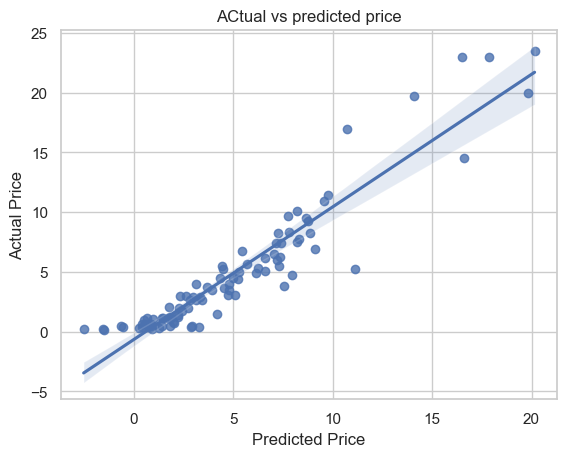

In [70]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel ('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()